In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Windfarm(object):
  def __init__(self, placement, L_x, L_y, R, alpha, C_t):
    self.placement = placement
    self.L_x = L_x
    self.L_y = L_y
    self.R = R
    self.alpha = alpha

    self.N, self.M = placement.shape
    self.d = R/alpha
    self.a = 0.5 - 0.5 * np.sqrt(1 - C_t)
    self._initialize_positions()

  def _initialize_positions(self):
    x = np.linspace(0, (self.M - 1) * self.L_x, self.M)
    y = np.linspace(0, (self.N - 1) * self.L_y, self.N)
    X, Y = np.meshgrid(x, y)

    self.P_1 = np.zeros((self.N, self.M, 2), dtype = float)
    self.P_1[:, :, 0] = X
    self.P_1[:, :, 1] = Y

  def show(self):
    x, y = [], []
    for i in range(self.N):
        for j in range(self.M):
            if self.placement[i,j] == True:
                y += [5.0/2 * (2 * i + 1)]
                x += [5.0/2 * (2 * j + 1)]
    
    plt.figure(figsize = (0.7 * self.M, 0.7 * self.N))
    plt.gca().invert_yaxis()
    plt.scatter(x, y, zorder = 2, marker = 's', s = 300)
    plt.xticks(range(0, 5 * (self.M + 1), 5), [])
    plt.yticks(range(0, 5 * (self.N + 1), 5), [])
    plt.ylim([0, 5 * self.N])
    plt.xlim([0, 5 * self.M])
    plt.grid(True)
    plt.tick_params(axis = 'both', color = (0,0,0,0))

  def produced_energy(self, u):
    u_0 = np.linalg.norm(u)
    v = u/u_0
    w = np.sqrt(self.alpha**2 + 1)
    A = np.sqrt((1 - self.a) / (1 - 2 * self.a))
    R_a = (self.R * A)

    L = np.zeros((self.N, self.M), dtype = float)

    for i in range(self.N):
      for j in range(self.M):
        if self.placement[i, j] == True:
          P_0 = self.P_1[i, j, :] - self.d * v
          P = self.P_1 - P_0
          abs_P = np.linalg.norm(P, axis = 2)
          prod_v_P = np.dot(P, v)
        
          x = prod_v_P - self.d

          r = (1 - (2 * self.a) / (1 + self.alpha * x / R_a)**2)

          influenced = np.full((N, M), True)
          influenced &= w * prod_v_P >= abs_P 
          influenced &= x > 0
          influenced &= self.placement
          influenced[i, j] = False
          

          L += np.where(influenced, (1 - r)**2, 0)

    # U = np.where(L != 0.0, u_0 * (1 - np.sqrt(L)), 0) + np.where(np.logical_and(L == 0.0, self.placement), u_0, 0)
    U = np.where(L != 0.0, u_0 * (1 - np.sqrt(L)), u_0) - np.where(np.logical_not(self.placement), u_0, 0)

    return 0.3 * np.sum(U ** 3)


In [3]:
N, M = 10, 10
placement = np.ones((N, M)) < 0.5
placement[0, :] = True
placement[5, :] = True
placement[-1, :] = True
R = 40
alpha = 0.5/np.log(60/0.3)
C_t = 0.88
farm = Windfarm(placement, 10 * R, 10 * R, R, alpha, C_t)

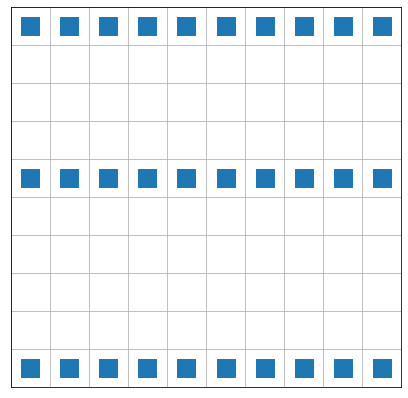

In [4]:
farm.show()

In [5]:
farm.produced_energy(12 * np.array([0, 1.0]))

14311.7423809819